# Descripción del proyecto


La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del curso de Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

# Tabla de contenidos

* [1. Inicialización](#1) 
    * [1.1 Información General de 'df'](#1.1)
* [2. EDA](#2)
* [3. Preparación del Modelo](#3)
* [4. Evaluación del Modelo](#4)
    * [4.1 Árbol de Decisión](#4.1)
    * [4.2 Bosque Aleatorio](#4.2)
    * [4.3 Regresión Logística](#4.3)
    * [4.4 Modelo de Cordura](#4.4)
* [5. Validación del Mejor Modelo](#5)
* [6. Conclusiones](#6)


## Inicialización

In [30]:
# CARGAMOS LAS LIBRERIAS

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [2]:
# CARGAMOS LA DATA

df = pd.read_csv('/datasets/users_behavior.csv')

### Información General de 'df'

In [3]:
# MOSTRAMOS UNA VISTA PREVIA

df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
# MOSTRAMOS LA INFORMACIÓN GENERAL

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Tenemos la siguiente información:

* **сalls**: número de llamadas,
* **minutes**: duración total de la llamada en minutos,
* **messages**: número de mensajes de texto,
* **mb_used**: tráfico de Internet utilizado en MB,
* **is_ultra**: plan para el mes actual (Ultra - 1, Smart - 0).

In [5]:
# MOSTRAMOS INFORMACIÓN ESTADÍSTICA

df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


**Conclusiones Intermedias**: 

**a**: Tenemos un conjunto de datos de 3214 entradas, con 5 columnas, donde todas tienen tipos float menos 'is_ultra' que es de tipo entero o 'int'.

**b**: El conjunto de datos no presenta valores ausentes ni duplicados.

**c**: Con respecto a las columnas, podemos ver que información como que el promedio de los megas consumidos por los usuarios es de 17207 en un mes, como también el promedio de llamadas es de 60 al mes. 



## EDA

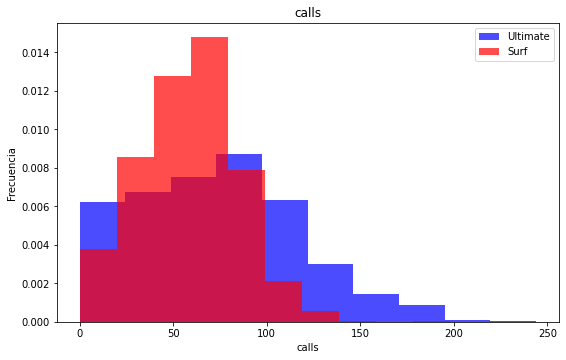

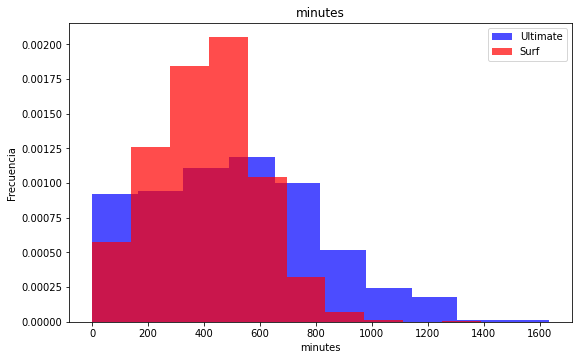

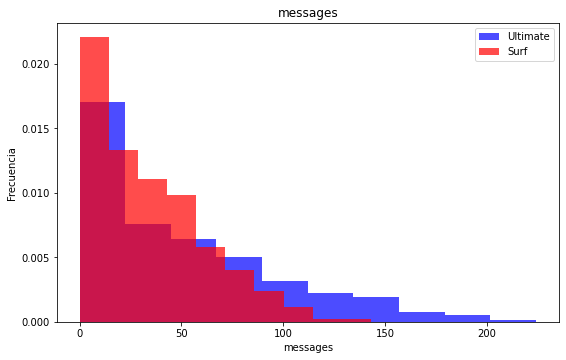

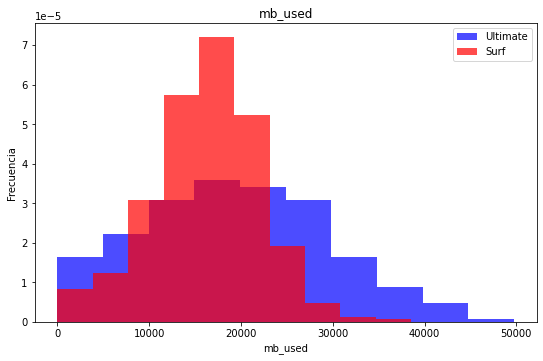

In [23]:
# REALIZAMOS UN ALGORITMO PARA MOSTRAR LA DISTRIBUCIÓN

for label in df.columns[:-1]:
    plt.figure(figsize=(9, 5.5))
    plt.hist(df[df['is_ultra']==1][label], color='blue', label='Ultimate', alpha=0.7, density=True)
    plt.hist(df[df['is_ultra']==0][label], color='red', label='Surf', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Frecuencia')
    plt.xlabel(label)
    plt.legend()
    plt.show()


**Conclusiones Intermedias**:

**a**. En el gráfico de las llamadas, visualizamos que los usuarios de ambos planes realizan mayormente entre 25 y 80 llamadas en un mes.

**b**. Observando a los minutos, tenemos que el consumo va desde los 200 hasta los 600 en un mes en promedio, para ambos planes.

**c**. Con respecto a los mensajes de texto, podemos observar que la mayoría de ambos usuarios no usan el servicio, siendo 30 mensajes de texto como máximo para el promedio de ambos usuarios.

**d**. Visualizando los megas consumidos, ambos usuarios utilizan en su mayoría entre los 10.000 y 20.000 megas al mes.

**e**. En materia general, hay varios picos en el estudio de las frecuencias y estos pertenecen a los usuarios del Plan Surf, mientras que al estudiar las variables de consumo, el Plan Ultimate ofrece mas recorrido.

## Preparación del Modelo

In [24]:
# PROCEDEMOS CON LA DIVISION DEL DATAFRAME EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 12345)

features_train = df_train.drop(['is_ultra'], axis = 1)
target_train = df_train['is_ultra']

features_test = df_test.drop(['is_ultra'], axis = 1)
target_test = df_test['is_ultra']

In [40]:
# MOSTRAMOS LAS DIMENSIONES DE LOS OBJETIVOS Y CARACTERÍSTICAS DE LOS CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(2410, 4)
(2410,)
(643, 4)
(643,)


In [26]:
# DAMOS UNA MUETRA DEL CONJUNTO DE ENTRENAMIENTO

df_train.head()

,calls,minutes,messages,mb_used,is_ultra
348,77.0,522.65,14.0,19462.45,0
1172,144.0,1031.79,99.0,40174.34,1
2315,48.0,341.65,0.0,19000.02,0
954,52.0,383.90,40.0,24574.82,0
2918,77.0,445.00,100.0,10518.28,1


## Evaluación del Modelo

### Árbol de Decisión 

In [27]:
# EVALUAMOS CON LOS DATOS DE PRUEBA

best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = accuracy_score(target_test, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result

print("Exactitud del mejor modelo en el conjunto de prueba:", round(best_result, 5))


Exactitud del mejor modelo en el conjunto de prueba: 0.78538


### Bosque Aleatorio

In [28]:
# EVALUAMOS CON LOS DATOS DE PRUEBA

best_score = 0
best_est = 0

for est in range(1,11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    score = model.score(features_test, target_test)
    
    if score > best_score:
        best_score = score
        best_est = est
            
print("Exactitud del mejor modelo en el conjunto de prueba (n_estimators = {}): {:.5f}".format(best_est, best_score))


Exactitud del mejor modelo en el conjunto de prueba (n_estimators = 4): 0.77449


### Regresión Logística

In [29]:
# EVALUAMOS CON LOS DATOS DE PRUEBA

model = LogisticRegression(random_state = 54321, solver = 'liblinear') 
model.fit(features_train, target_train) 
score_test = model.score(features_test, target_test)

print("Exactitud del modelo en el conjunto de prueba:", round(score_test, 5))

Exactitud del modelo en el conjunto de prueba: 0.70295


### Modelo de Cordura (Model Sanity Check)

In [33]:
# EVALUAMOS CON LOS DATOS DE PRUEBA

model = DummyClassifier(random_state = 42)
model.fit(features_test, target_test)
predictions = model.predict(features_test)
score_test = model.score(features_test, target_test)

print("Exactitud del modelo en el conjunto de prueba:", round(score_test, 5))


Exactitud del modelo en el conjunto de prueba: 0.69518


**Conclusiones Intermedias**:

Despues de evaluar los modelos en los conjuntos de prueba, tenemos los siguientes resultados:

* **Árbol de Decisión**: 0.78538
* **Bosque Aleatorio**: 0.77449
* **Regresión Logísitca**: 0.70295
* **Modelo de Cordura**: 0.69518

Donde el mejor resultado de exactitud nos los da el modelo de **Árbol de Decisión**. Por ende, se utilizará dicho modelo para aplicarle el conjunto de validación.

## Validación del Mejor Modelo

In [35]:
# PROCEDEMOS CON LA DIVISION DEL DATAFRAME EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

df_train, df_valid = train_test_split(df, test_size = 0.25, random_state = 12345)

features_train = df_train.drop(['is_ultra'], axis = 1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis = 1)
target_valid = df_valid['is_ultra']

In [41]:
# MOSTRAMOS LAS DIMENSIONES DE LOS OBJETIVOS Y CARACTERÍSTICAS DE LOS CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(2410, 4)
(2410,)
(804, 4)
(804,)


In [37]:
# EVALUAMOS CON LOS DATOS DE PRUEBA

best_model_v = None
best_result_v = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions_v = model.predict(features_valid)
    result_v = accuracy_score(target_valid, predictions_v)
    
    if result_v > best_result_v:
        best_model = model
        best_result_v = result_v

print("Exactitud del mejor modelo en el conjunto de validación:", round(best_result_v, 5))

Exactitud del mejor modelo en el conjunto de validación: 0.78856


## Conclusiones

**a**: Tenemos un conjunto de datos con 3214 entradas por columnas, donde son 5. Este conjunto, no presentó valores ausentes ni duplicados.

**b**: En el EDA, visualizamos las interacciones entre los usuarios del Plan Surf y Ultimate, las tendencias de consumo por el mes estudiado.

**c**: Aplicamos 4 modelos, donde la mejor exactitud nos las dio el **Árbol de Decisión**, con una exactitud de 0.78538.

**d**: Al momento de validar el modelo, la exactitud tuvo un ligero cambio de 0.00318, con un cambio en la proporción de la división de los conjuntos en 75:25.
